<a href="https://colab.research.google.com/github/gstathos1/Python-Jupyter-Mini-Project/blob/main/Python_Jupyter_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import os

Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy (www.activestate.com). It is what I used to later create a graph.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The original csv file I used that is actually being analyzed by this code is located in my Google Drive, so this line allows Google Drive to access my Drive.

In [ ]:
import pandas as pd

Here I import pandas, which is a python library for data manipulation and analysis(www.simpllilearn.com)

In [ ]:
driving_datafilename = '/content/drive/MyDrive/Python Project Speed/driving_data (1).csv'
speedlimit_filename = '/content/drive/MyDrive/Python Project Speed/speedlimit (1).csv'
output = '/content/drive/MyDrive/Python Project Speed/program_output.csv'
graph = '/content/drive/MyDrive/Python Project Speed/speed_graph.pdf'

Here I set up and assign names to all the places that python will fetch the csv files from as well as where the output files will go.

In [ ]:
driving_df = pd.read_csv(driving_datafilename)
speedlimit_df = pd.read_csv(speedlimit_filename)

Here I have pandas read the csv files into a DataFrame.

In [ ]:
print(driving_df.head())

   Time(minutes)  Speed(MPH)
0          8.014    0.000000
1          8.020    2.485485
2          8.024    3.728227
3          8.029    3.728227
4          8.034    6.213712


In [ ]:
print(speedlimit_df.head())

   Time (minutes)   Speed Limit (MPH)
0           0.000                  55
1          41.361                  40
2          43.903                  55
3          50.813                  40
4          52.005                  30


In [ ]:
def speeding(row, speed_limit):
  in_between = speed_limit.loc[(speed_limit["Time (minutes)"] <= row["Time(minutes)"])]
  in_between = in_between.sort_values(by="Time (minutes)")

  return True if row["Speed(MPH)"] > in_between[" Speed Limit (MPH)"].iloc[-1] else False


In [ ]:
driving_df["Over Speed Limit"] = driving_df.apply(lambda row: speeding(row, speedlimit_df), axis=1)

Here I apply the function I created to analyze the drivers speed to the driving_df file, and add the outputs of this function in a new column of the .csv file 

In [ ]:
driving_df.to_csv(output)

This outputs the new csv with an added column that includes whether the driver is speeding at that specific time by including "TRUE" or "FALSE" in the corresponding cells of the new "Over Speed Limit" column.

In [ ]:
print(len(driving_df.index))

12425


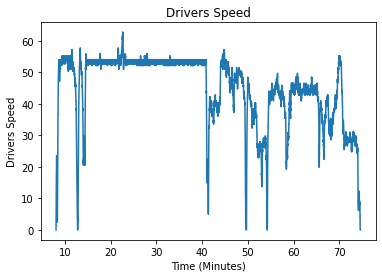

In [ ]:
plt.figure()
plt.plot(driving_df["Time(minutes)"].values, driving_df["Speed(MPH)"].values)
plt.title("Drivers Speed")
plt.xlabel("Time (Minutes)")
plt.ylabel("Drivers Speed")
plt.savefig(graph, bbox_inches="tight")
plt.show()